<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Занятие 7. Задача Обучение без учителя
## <center>Часть 1а. Метод главных компонент. Игрушечный пример

In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Пусть дана выборка X.**

In [2]:
X = np.array([[1., 3.],
              [3., 5.],
              [5., 1.],
              [7., 4.],
              [4., 7.]])

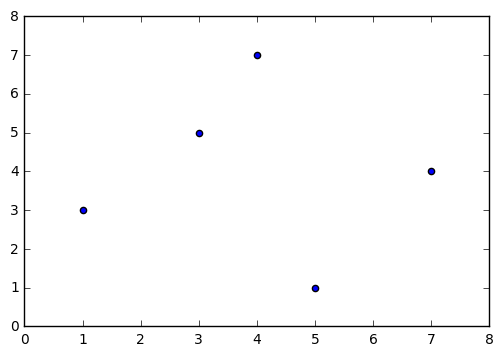

In [3]:
scatter(X[:,0], X[:, 1]);

**Как выбрать направление, в проекции на которое дисперсия координат точек максимальна? Синия прямая или зеленая? А может, красная?**

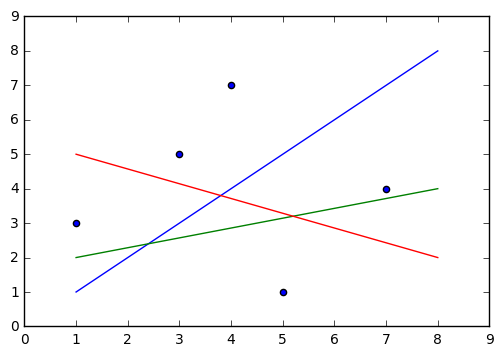

In [4]:
scatter(X[:,0], X[:, 1])
plot(np.linspace(1,8,10), np.linspace(1,8,10))
plot(np.linspace(1,8,10), np.linspace(2,4,10))
plot(np.linspace(1,8,10), np.linspace(5,2,10));

**Стандартизуем матрицу X. Вычитаем средние по столбцам (4 и 4) и делим но стандартные отклонения по столбцам (2 и 2). Кстати, пришлось писать код, чтоб подобрать координаты так, чтоб все средние и отклонения были целыми :)**

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
X_scaled = StandardScaler().fit_transform(X)

In [7]:
X_scaled

array([[-1.5, -0.5],
       [-0.5,  0.5],
       [ 0.5, -1.5],
       [ 1.5,  0. ],
       [ 0. ,  1.5]])

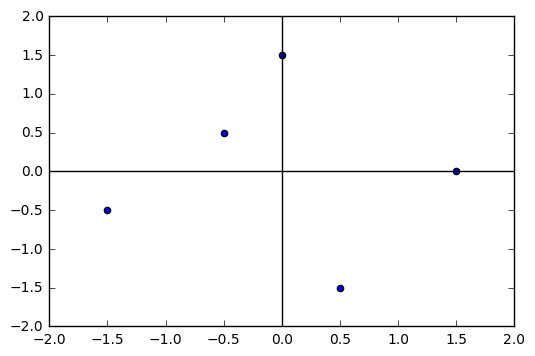

In [8]:
scatter(X_scaled[:, 0], X_scaled[:, 1])
plot([-2,2],[0,0], c='black')
plot([0,0],[-2,2], c='black')
xlim(-2,2)
ylim(-2,2);

**Назовем новые координаты (стоблцы матрицы X_scaled) $x_1$ и $x_2$. Задача: найти такую линейную комбинацию $z = \alpha x_1 + \beta x_2$, что дисперсия $z$ максимальна. При этом должно выполняться $\alpha^2 + \beta^2 = 1.$**
**Заметим что $$\Large D[z] = E[(z - E[z])^2]  = E[z^2] = \frac{1}{n} \sum_i^n z_i^2,$$ поскольку $E[z] = \alpha E[x_1] + \beta E[x_2] = 0$ (новые координаты центрированы).**

**Тогда задача формализуется так:**
$$\Large \begin{cases} \max_{\alpha, \beta} \sum_i^n (\alpha x_{1_i} + \beta x_{2_i})^2 \\  \alpha^2 + \beta^2 = 1\end{cases}$$

У нас $2z = [-3\alpha -\beta,\ -\alpha +\beta,\ \alpha -3\beta,\ 3\alpha,\ 3\beta]^T$ (Для задачи максимизации неважно, что мы умножили на 2, зато так удобней).
           

Распишем в нашем случае: $  \sum_i^n (\alpha x_{1_i} + \beta x_{2_i})^2 = (-3\alpha -\beta)^2 + ( -\alpha +\beta)^2 +( \alpha -3\beta)^2 +( 3\alpha)^2 +( 3\beta)^2 = 20\alpha^2 - 2\alpha\beta + 20\beta^2$ =  <font color='green'>\\ поскольку $\alpha^2 + \beta^2 = 1$ \\ </font>  = $20 - 2\alpha\beta$. Осталось только минимизировать $\alpha\beta$. Можно это делать методом Лагранжа, но в данному случае можно проще

$$\Large \begin{cases} \min_{\alpha, \beta} \alpha\beta \\  \alpha^2 + \beta^2 = 1\end{cases}$$

$\Large \alpha\beta = \beta^2(\frac{\alpha}{\beta})$ = <font color='green'>\\ замена t = $\frac{\alpha}{\beta}, \alpha^2 + \beta^2 = 1$ \\  </font> = $\Large \frac{t}{1+t^2}$. Ищем минимум функции одной переменной, находим, что $t^* = -1$.

Значит, $$\Large \begin{cases} \alpha^* = -\beta^*\\  (\alpha^*)^2 + (\beta^*)^2 = 1\end{cases} \Rightarrow \alpha^* = 
\frac{1}{\sqrt{2}}, \beta^* = - \frac{1}{\sqrt{2}}$$

Итак, $$\Large z = \frac{1}{\sqrt{2}} x_1 - \frac{1}{\sqrt{2}}x_2$$ То есть ось $z$ повернута на 45 градусов относительно $x_1$ и $x_2$ и "направлена на юго-восток".

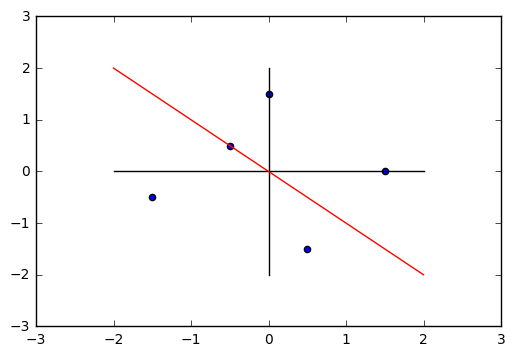

In [9]:
scatter(X_scaled[:, 0], X_scaled[:, 1])
plot([-2,2],[0,0], c='black')
plot([0,0],[-2,2], c='black')
plot([-2,2],[2,-2], c='red');

**Новые координаты точек по оси z:**

In [10]:
X_scaled.dot(np.array([1./np.sqrt(2), -1./np.sqrt(2)]))

array([-0.70710678, -0.70710678,  1.41421356,  1.06066017, -1.06066017])

## Сингулярное разложение матрицы X

Представление будет таким: $X = U\Sigma V^T$. 

- Матрица $U$ составлена из собственных векторов матрицы $XX^T$. Это левые сингулярные векторы матрицы $X$;
- Матрица $V$ составлена из собственных векторов матрицы $X^TX$. Это правые сингулярные векторы матрицы $X$;
- Матрица $\Sigma$ - диагональная (вне главной диагонали нули), и на диагонали стоят корни  из собственных значений матрицы $X^TX$ (или $XX^T$). Это сингулярные числа матрицы $X$.

$XX^T$ выглядит так:

In [11]:
X_scaled.dot(X_scaled.T)

array([[ 2.5 ,  0.5 ,  0.  , -2.25, -0.75],
       [ 0.5 ,  0.5 , -1.  , -0.75,  0.75],
       [ 0.  , -1.  ,  2.5 ,  0.75, -2.25],
       [-2.25, -0.75,  0.75,  2.25,  0.  ],
       [-0.75,  0.75, -2.25,  0.  ,  2.25]])

$X^TX$ выглядит так:

In [12]:
X_scaled.T.dot(X_scaled)

array([[ 5.  , -0.25],
       [-0.25,  5.  ]])

Собственные вектора $XX^T$ (левые сингулярные):

In [13]:
np.linalg.eig(X_scaled.dot(X_scaled.T))[1]

array([[ -6.95492109e-01,   6.48885685e-01,  -3.08606700e-01,
         -4.93588385e-01,  -2.10161344e-01],
       [  1.36936270e-01,   2.22272696e-16,  -3.08606700e-01,
          5.52002072e-01,  -7.51396981e-01],
       [  2.88286884e-02,   3.24442842e-01,   6.17213400e-01,
          4.69072384e-01,   1.49094025e-01],
       [ -6.59456248e-01,  -4.86664263e-01,   4.62910050e-01,
         -4.65945155e-01,  -5.10325012e-01],
       [ -2.48647438e-01,  -4.86664263e-01,  -4.62910050e-01,
          1.20542232e-01,   3.29505903e-01]])

Собственные вектора $X^TX$ (правые сингулярные). Эти вектора задают представление главных компонент через исходные координаты (то есть они задают поворот).

In [14]:
np.linalg.eig(X_scaled.T.dot(X_scaled))[1]

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Видно, что главные компоненты: $$\Large z_1 = \frac{1}{\sqrt{2}} x_1 - \frac{1}{\sqrt{2}}x_2,\ z_2 = \frac{1}{\sqrt{2}} x_1 + \frac{1}{\sqrt{2}}x_2$$

Собственные значения $X^TX$ (сингулярные числа):

In [15]:
np.linalg.eig(X_scaled.T.dot(X_scaled))[0]

array([ 5.25,  4.75])

In [16]:
np.linalg.eig(X_scaled.dot(X_scaled.T))[0]

array([  0.00000000e+00,   4.75000000e+00,   5.25000000e+00,
        -2.36631879e-16,   1.43662124e-16])

In [17]:
from scipy.linalg import svd
U, Sigma, VT = svd(X_scaled)

Действительно. На диагонали матрицы $\Sigma$ стоят корни из собственных значений $X^TX$ ($\sqrt{5.25} \approx 2.29, \sqrt{4.75} \approx 2.18$):

In [18]:
Sigma

array([ 2.29128785,  2.17944947])

Вектора матрицы $VT$ (правые сингулярные векторы для исходной матрицы) задают поворот. То есть первая главная компонента "смотрит на юго-восток", вторая - на юго-запад.

In [19]:
VT

array([[ 0.70710678, -0.70710678],
       [-0.70710678, -0.70710678]])

Представление данных в проекции на 2 главные компоненты $Z = XV$:

In [20]:
X_scaled.dot(VT.T)

array([[ -7.07106781e-01,   1.41421356e+00],
       [ -7.07106781e-01,  -2.77555756e-16],
       [  1.41421356e+00,   7.07106781e-01],
       [  1.06066017e+00,  -1.06066017e+00],
       [ -1.06066017e+00,  -1.06066017e+00]])

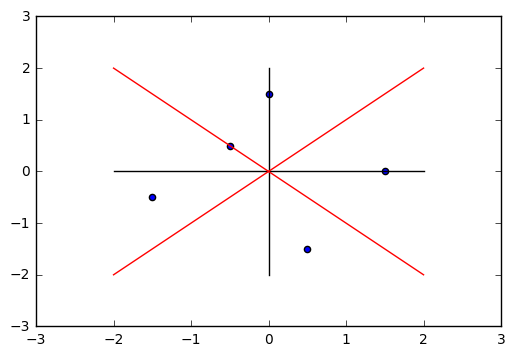

In [21]:
scatter(X_scaled[:, 0], X_scaled[:, 1])
plot([-2,2],[0,0], c='black')
plot([0,0],[-2,2], c='black')
plot([-2,2],[2,-2], c='red')
plot([-2,2],[-2,2], c='red');

Здесь SVD SciPy "направил" ось z1 вправо и вниз, а ось z2 - влево и вниз. Можно проверить, что представление получилось правильным. 